### Curso-Taller 2019: Aprendizaje Automático e Imágenes en Python 
* Docentes:  Dra. Valeria S. Rulloni - Dra. Laura M. Vargas
* Ayudantes: Axel Aguerreberry - Sebastián Palacio
* Colaboradoras: Dra. Ana Carolina Maldonado - Dra. Claudia Egea

### Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Clasificación de imágenes.
*	**Aprendizaje automático
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones: Grafos para segmentación de imágenes, entre otras.



# Laboratorio Parte 1: Keras, MNIST data y redes totalmente conectadas (FC)

In [1]:
# importo librerias necesarias     
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

Using TensorFlow backend.


In [4]:
from tensorflow.examples.tutorials.mnist import input_data

# importo y guardo MNIST data
mnist = input_data.read_data_sets("./mnist/data/")#, one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


## Exploración del dataset

In [5]:
# dimensiones de la data
print(f"Imagenes de Entrenamiento: {mnist.train.images.shape}")
print(f"Labels de Entrenamiento: {mnist.train.labels.shape}")

print(f"Imagenes de Testeo: {mnist.test.images.shape}")
print(f"Labels de Testeo: {mnist.test.labels.shape}")

Imagenes de Entrenamiento: (55000, 784)
Labels de Entrenamiento: (55000,)
Imagenes de Testeo: (10000, 784)
Labels de Testeo: (10000,)


Cuántas imágenes de entrenamiento tiene la base? 
cuantos pixeles tiene cada una?


Etiquetas One hot Encoding:

In [6]:
from tensorflow.examples.tutorials.mnist import input_data

# importo y guardo MNIST data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


Exploración del Data Set con Etiquetas One hot Encoding:

In [7]:
# dimensiones de la data
print(f"Imagenes de Entrenamiento: {mnist.train.images.shape}")
print(f"Labels de Entrenamiento: {mnist.train.labels.shape}")

print(f"Imagenes de Testeo: {mnist.test.images.shape}")
print(f"Labels de Testeo: {mnist.test.labels.shape}")

Imagenes de Entrenamiento: (55000, 784)
Labels de Entrenamiento: (55000, 10)
Imagenes de Testeo: (10000, 784)
Labels de Testeo: (10000, 10)


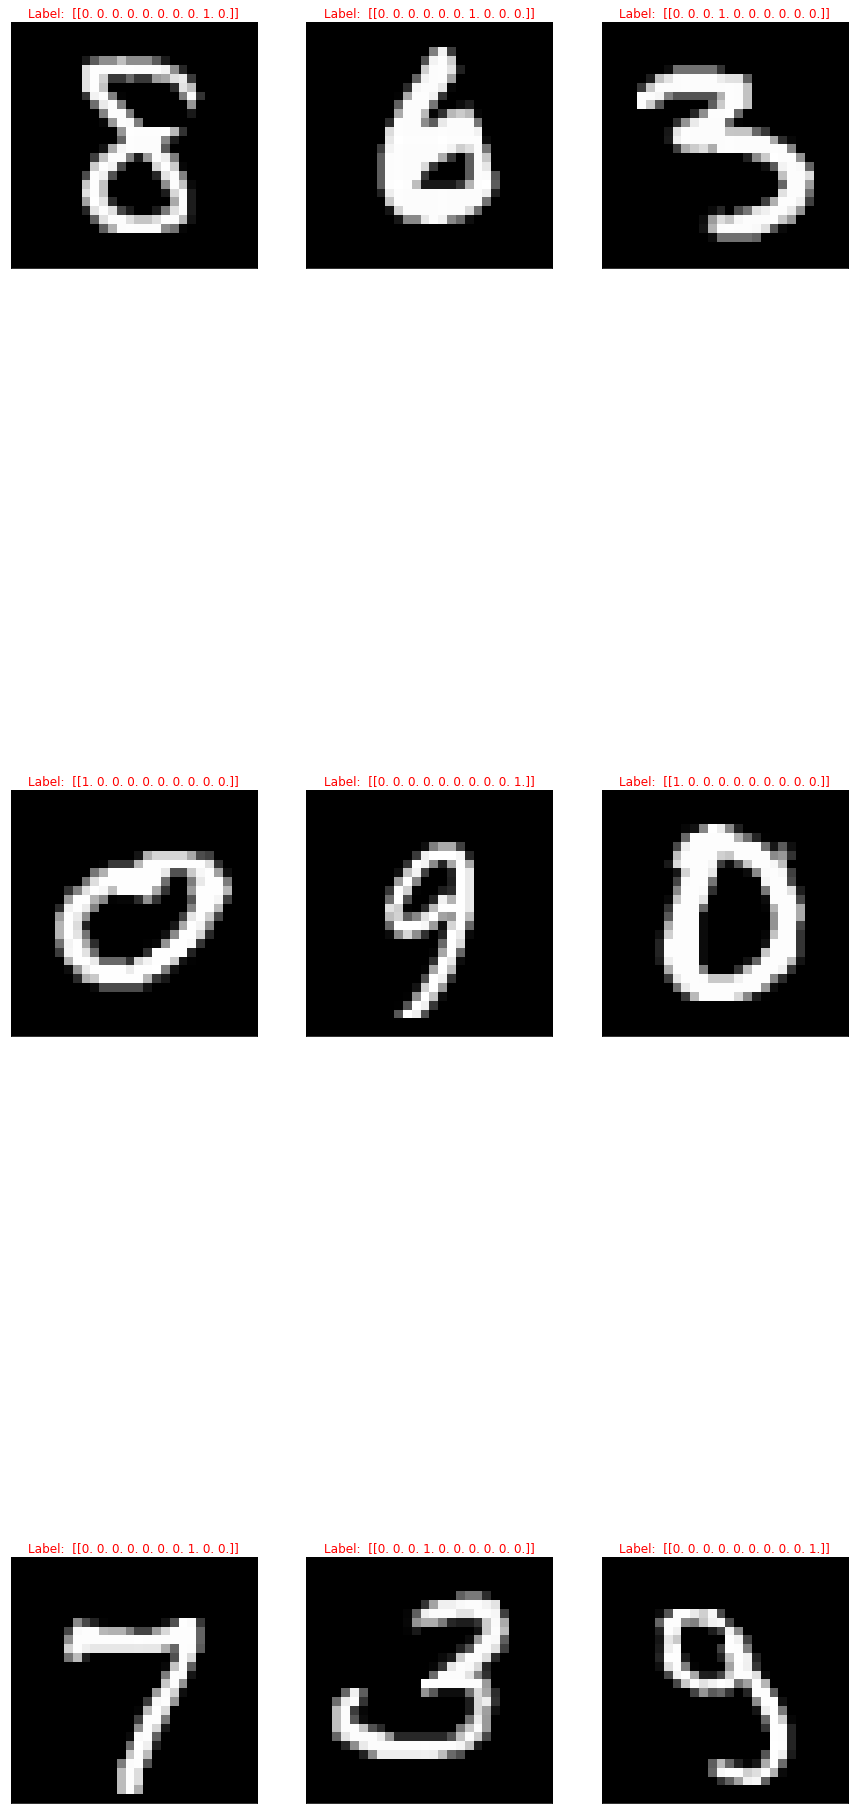

In [8]:
# visualizamos algunas imagenes
fig, ax = plt.subplots(3, 3, figsize=[15, 40])

random_image = np.random.randint(low=0, high=55000, size=1)

for j in range(3):
    for i in range(3):
        
       random_image = np.random.randint(low=0, high=55000, size=1)

       ax[i,j].imshow(mnist.train.images[random_image].reshape(28,28), 'gray')
       ax[i,j].set_xticks([])
       ax[i,j].set_yticks([])
       ax[i,j].set_title('Label:  ' + str(mnist.train.labels[random_image]), color='r')


#fig.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

### Documentación de Keras: https://keras.io/

# Definición y entramiento del Modelo

In [0]:
### A completar: definir capa de entrada, capas ocultas, y capa de salida
### Utilizar funciones Input(), Dense()

entrada = Input(shape=(784,))
layer1 = Dense(32, activation='sigmoid')(entrada)
layer2 = Dense(128, activation='sigmoid')(layer1)
predicciones = Dense(10, activation='softmax')(layer2)

###

In [0]:
### A completar: definir entrada y salida del modelo

model = Model(inputs=entrada, outputs=predicciones)

###

In [12]:
### A completar: definir optimizador y funcion de costo

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

###

In [0]:
## para guardar el modelo
filepath = "prueba1.h5"
model_checkpoint = ModelCheckpoint(filepath, monitor='loss',verbose=1, save_best_only=True)

In [14]:
history = model.fit(mnist.train.images, mnist.train.labels,
              batch_size=32,
              epochs=50, validation_data=(mnist.test.images, mnist.test.labels), callbacks=[model_checkpoint])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 55000 samples, validate on 10000 samples
Epoch 1/50





55000/55000 [==============================] - 3s 62us/step - loss: 0.6135 - acc: 0.8388 - val_loss: 0.2720 - val_acc: 0.9207

Epoch 00001: loss improved from inf to 0.61349, saving model to prueba1.h5
Epoch 2/50
55000/55000 [==============================] - 3s 48us/step - loss: 0.2429 - acc: 0.9279 - val_loss: 0.2062 - val_acc: 0.9392

Epoch 00002: loss improved from 0.61349 to 0.24295, saving model to prueba1.h5
Epoch 3/50
55000/55000 [==============================] - 3s 48us/step - loss: 0.1925 - acc: 0.9427 - val_loss: 0.1704 - val_acc: 0.9482

Epoch 00003: loss improved from 0.24295 to 0.19255, saving model to prueba1.h5
Epoch 4/50
55000/55000 [==============================] - 3s 48us/step - loss: 0.1644 - acc: 0.9506 - val_loss: 0.1633 - val_acc: 0.9478

Epoch 00004: loss improved from 0.19255 to 0.16439, saving mode

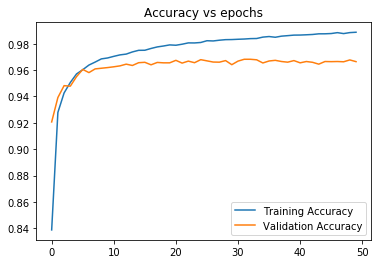

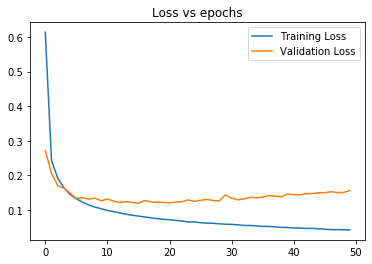

In [16]:
## visuzalimos curvas de entrenamiento

plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'] )
plt.legend(['Training Accuracy', 'Validation Accuracy'])


plt.figure()
plt.title("Loss vs epochs")
plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.legend(['Training Loss', 'Validation Loss'])

## Usemos este modelo para hacer predicciones

In [20]:
## A completar: utilizar imagenes de testeo

predicciones = model.predict(mnist.test.images)
print(predicciones.shape)
##

(10000, 10)


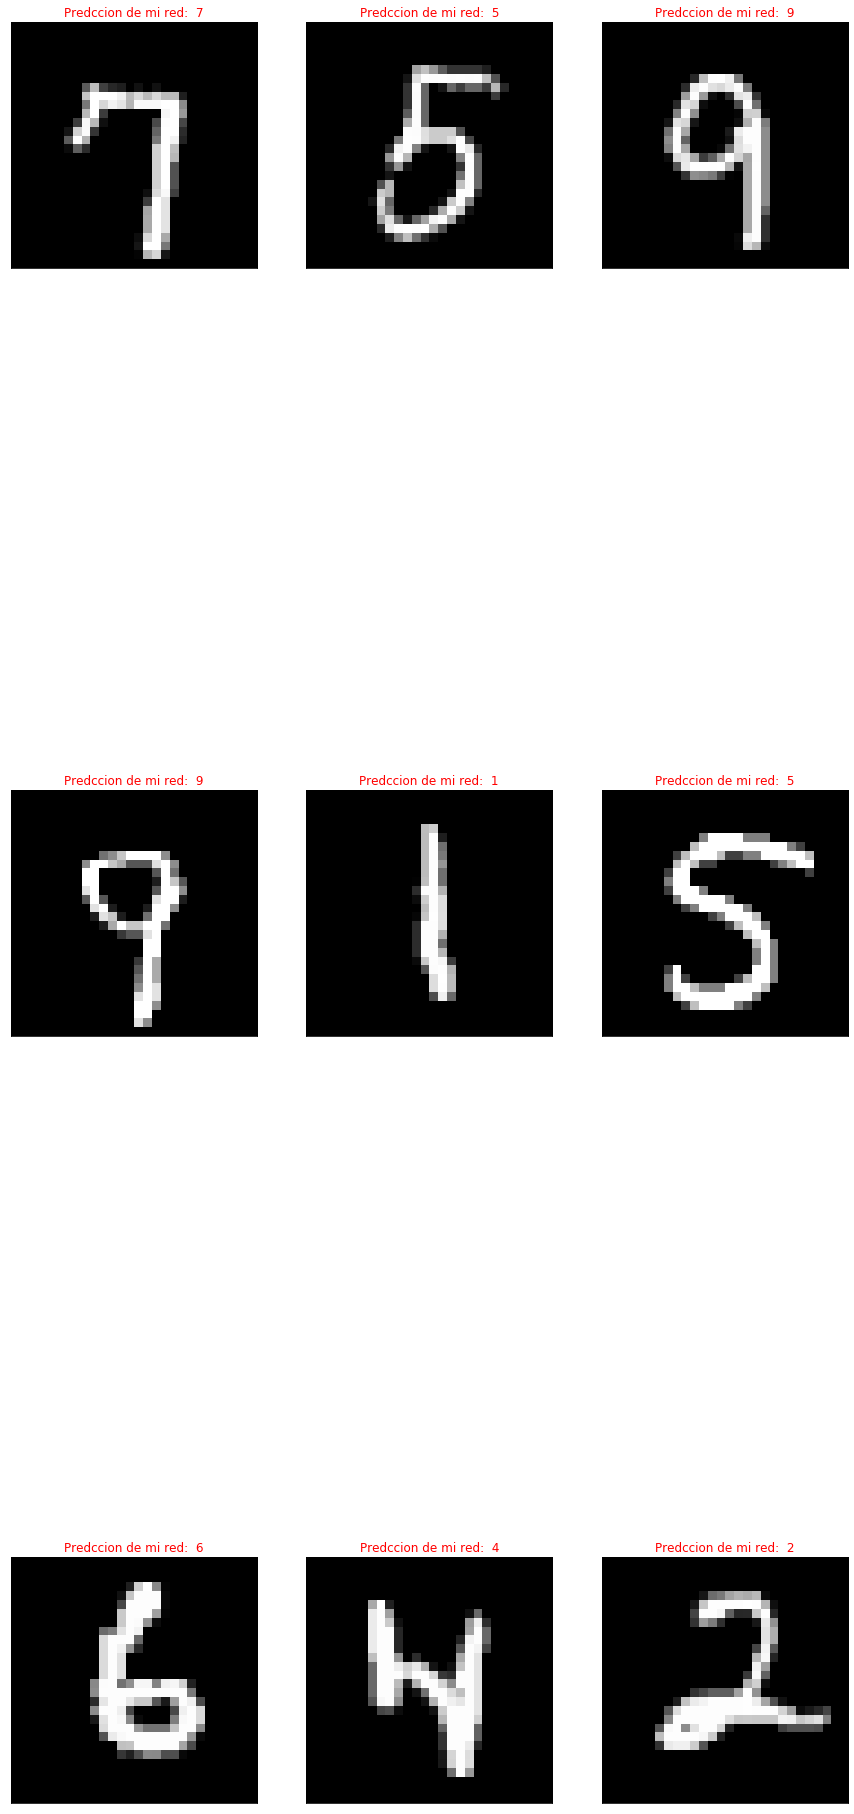

In [23]:
fig, ax = plt.subplots(3, 3, figsize=[15, 40])


for j in range(3):
    for i in range(3):
        
       random_image = np.random.randint(low=0, high=1000, size=1)

       ax[i,j].imshow(mnist.test.images[random_image].reshape(28,28), 'gray')
       ax[i,j].set_xticks([])
       ax[i,j].set_yticks([])
       ax[i,j].set_title('Predccion de mi red:  ' + str(np.argmax(predicciones[random_image])), color='r')

plt.show()